<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/Model_revisi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import numpy as np
import pandas as pd

In [238]:
feature = pd.read_excel('/content/input_big_4.xlsx',sheet_name='Sheet2')
label = pd.read_excel('/content/data_big_4.xlsx', sheet_name='Sheet2')

In [239]:
feature.describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,...,5760.000000,5760.00000,5760.000000,5760.00000,5760.00000,5760.000000,5760.000000,5760.00000,5760.000000,5760.00000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.499826,0.75000,0.500000,0.25000,0.75000,0.500000,0.499826,0.75000,0.500000,0.25000
std,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,...,0.500043,0.43305,0.500043,0.43305,0.43305,0.500043,0.500043,0.43305,0.500043,0.43305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.75000,0.000000,0.00000,0.75000,0.000000,0.000000,0.75000,0.000000,0.00000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,1.00000,0.500000,0.00000,1.00000,0.500000,0.000000,1.00000,0.500000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,0.25000,1.00000,1.000000,1.000000,1.00000,1.000000,0.25000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000


In [240]:
label.describe()

,koor_x,koor_y,Vx,Vy,Temp
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,54.883160,101.048611,0.012273,-0.004701,25.359077
std,40.591469,55.065126,0.052255,0.070281,3.200991
min,1.000000,6.000000,-0.339456,-0.442086,19.901247
25%,20.000000,64.000000,0.000000,-0.013963,23.058064
50%,55.000000,100.000000,0.004428,0.000000,25.183301
75%,94.000000,149.000000,0.030821,0.016093,27.636549
max,131.000000,202.000000,0.219833,0.480368,33.937473


In [241]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [242]:
def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

In [243]:
from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

In [244]:
array_x = []

for i in range(30):
  frame = feature[i::30]
  frame = norm(frame)
  #frame = standard(frame) 
  array_x.append(frame)

In [245]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame= remap(frame,0.5,-0.5)
  #frame = standard(frame)
  array_y.append(frame)

In [246]:
array_x[1].describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.750000,0.500000,0.250000,0.750000,0.500000,0.500000,0.750000,0.500000,0.250000
std,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,...,0.501307,0.434145,0.501307,0.434145,0.434145,0.501307,0.501307,0.434145,0.501307,0.434145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.500000,0.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
array_y[1].describe()

,Vx,Vy
count,192.000000,192.000000
mean,-0.108121,-0.122119
std,0.164091,0.190217
min,-0.500000,-0.500000
25%,-0.190320,-0.209720
50%,-0.137517,-0.132588
75%,-0.109655,-0.089552
max,0.500000,0.500000


In [248]:
#data input tiap skenario untuk titik 1-30
array_x[1].describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.750000,0.500000,0.250000,0.750000,0.500000,0.500000,0.750000,0.500000,0.250000
std,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,...,0.501307,0.434145,0.501307,0.434145,0.434145,0.501307,0.501307,0.434145,0.501307,0.434145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.500000,0.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
#data output tiap skenario untuk titik 1-30
array_y[1].describe()

,Vx,Vy
count,192.000000,192.000000
mean,-0.108121,-0.122119
std,0.164091,0.190217
min,-0.500000,-0.500000
25%,-0.190320,-0.209720
50%,-0.137517,-0.132588
75%,-0.109655,-0.089552
max,0.500000,0.500000


In [250]:
! mkdir models

y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = array_x[i]
  y = array_y[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.1)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}')

mkdir: cannot create directory ‘models’: File exists


In [251]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [252]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [253]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 48, 2), (30, 48, 2))

In [254]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

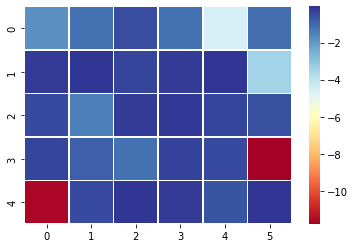

In [255]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

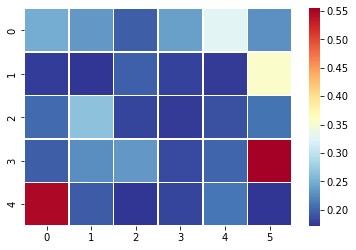

In [256]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

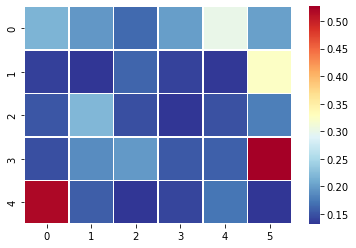

In [257]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [258]:
scenarios = 5   #0-28
indexing = 0    # vx,vy,temp

In [259]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
'''
a = np.array(a)
b = np.array(b)
a = a.reshape(5,6)
b = b.reshape(5,6)
print('reshaped')
'''

"\na = np.array(a)\nb = np.array(b)\na = a.reshape(5,6)\nb = b.reshape(5,6)\nprint('reshaped')\n"

In [260]:
a

array([-0.16947689, -0.14307683, -0.11754169, -0.11629713, -0.32289321,
       -0.11494357,  0.17706717,  0.08993798,  0.00527278,  0.14309626,
       -0.01179286, -0.05543454,  0.10291116,  0.33300857,  0.31248923,
        0.21533879,  0.18748999, -0.19022048,  0.1564599 , -0.11832352,
       -0.19164048, -0.10022797, -0.1107832 , -0.5       , -0.5       ,
        0.26187689, -0.01428787,  0.2795704 ,  0.30328951,  0.13311149])

In [261]:
b

array([-0.1541999 , -0.09399765, -0.02844557, -0.07688548, -0.30230895,
       -0.09403628,  0.18304002,  0.15105699,  0.05523018,  0.18169777,
        0.08494917, -0.06370763,  0.1410701 ,  0.20867999,  0.06400228,
        0.15405849,  0.22094627,  0.00629314,  0.17808622, -0.02729406,
       -0.09241225,  0.00133442,  0.0172705 , -0.48074384, -0.47989508,
        0.22773803,  0.09004175,  0.16275038,  0.23070112,  0.13970424])

In [262]:
df_koor_x = pd.DataFrame(label['koor_x'])
df_koor_y = pd.DataFrame(label['koor_y'])
df_koor = df_koor_x.join(df_koor_y)

In [263]:
df=[]
for i in range(192):
  df.append(df_koor[i:i+30])

df=pd.concat(df)

In [264]:
'''
def suhu(y):
  df_y = pd.DataFrame(y[...,scenarios,0])
  df_z = pd.DataFrame(y[...,scenarios,1])
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y
  '''

"\ndef suhu(y):\n  df_y = pd.DataFrame(y[...,scenarios,0])\n  df_z = pd.DataFrame(y[...,scenarios,1])\n  df_z.rename(columns={0:1},inplace=True)\n  df_y = df_y.join(df_z)\n  df_y = df_y.join(df_koor)\n  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)\n  df_y.pop('Vx')\n  return df_y\n  "

In [265]:
'''
suhu_test = suhu(y_testing)
suhu_pred = suhu(y_predict)
'''

'\nsuhu_test = suhu(y_testing)\nsuhu_pred = suhu(y_predict)\n'

In [266]:
r2(a,b), mse(a,b), mae(a,b)

(0.8415535622311008, 0.007647603335148299, 0.06708589677882713)

In [267]:
'''
import plotly.graph_objects as go
fig = go.Figure(data =
    go.Contour(
        z = suhu_test['suhu'].tolist(),
        x = suhu_test['koor_x'].tolist(),
        y = suhu_test['koor_y'].tolist()
    ))
fig.show()
'''

"\nimport plotly.graph_objects as go\nfig = go.Figure(data =\n    go.Contour(\n        z = suhu_test['suhu'].tolist(),\n        x = suhu_test['koor_x'].tolist(),\n        y = suhu_test['koor_y'].tolist()\n    ))\nfig.show()\n"

In [268]:
'''
fig = go.Figure(data =
    go.Contour(
        z = suhu_pred['suhu'].tolist(),
        x = suhu_pred['koor_x'].tolist(),
        y = suhu_pred['koor_y'].tolist()
    ))
fig.show()\
'''

"\nfig = go.Figure(data =\n    go.Contour(\n        z = suhu_pred['suhu'].tolist(),\n        x = suhu_pred['koor_x'].tolist(),\n        y = suhu_pred['koor_y'].tolist()\n    ))\nfig.show()"

In [269]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver
#scenarios = 10

In [270]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  #df_x = remap(df_x,0.219833,-0.339456)
  df_y = pd.DataFrame(y[...,scenarios,1])
  #df_y = remap(df_y,0.480368,-0.442086)
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [271]:
angin_test = kec_angin(y_testing,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [272]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [273]:
tampilan_vektor(angin_test,50,0.1)

In [274]:
tampilan_vektor(angin_pred,50,0.1)

In [275]:
!zip -r /content/models.zip /content/models

updating: content/models/ (stored 0%)
updating: content/models/model 27 (deflated 51%)
updating: content/models/model 24 (deflated 52%)
updating: content/models/model 9 (deflated 52%)
updating: content/models/model 12 (deflated 52%)
updating: content/models/model 26 (deflated 52%)
updating: content/models/model 17 (deflated 52%)
updating: content/models/model 5 (deflated 52%)
updating: content/models/model 28 (deflated 51%)
updating: content/models/model 0 (deflated 52%)
updating: content/models/model 21 (deflated 52%)
updating: content/models/model 23 (deflated 52%)
updating: content/models/model 2 (deflated 52%)
updating: content/models/model 18 (deflated 51%)
updating: content/models/model 16 (deflated 52%)
updating: content/models/model 20 (deflated 52%)
updating: content/models/model 11 (deflated 52%)
updating: content/models/model 25 (deflated 51%)
updating: content/models/model 19 (deflated 52%)
updating: content/models/model 7 (deflated 51%)
updating: content/models/model 10 (d